In [9]:
import pandas as pd
from pandas import Series, DataFrame

In [10]:
titanic_df = pd.read_csv("train.csv")

In [3]:
# survived --- 0 = false, 1 = true
# SibSp(siblings on board) --- 0 = false, 1 = true
# Parch(Parents/Child on board) --- 0 = false, 1 = true
# Cabin --- A, B, C, D, E, F, G decks
# Embarked --- S, C, Q are cities
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Basic Questions

# 1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
# 2.) What deck were the passengers on and how does that relate to their class?
# 3.) Where did the passengers come from?
# 4.) Who was alone and who was with family?

# More in-depth questions

# 5.) What factors helped someone survive the sinking?

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

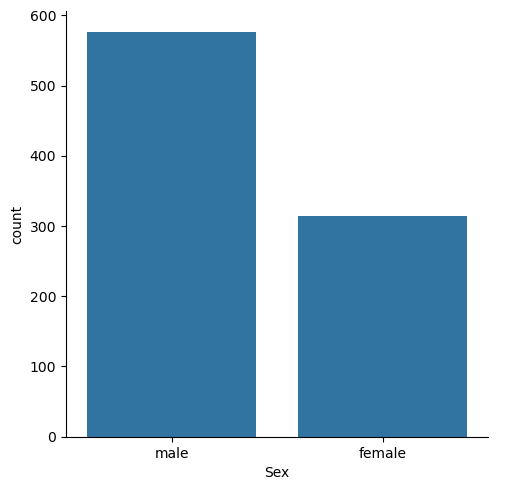

In [16]:
sns.catplot(data = titanic_df, x="Sex", kind="count")
plt.show()

In [4]:
sns.catplot(data = titanic_df, x="Sex", kind="count", hue="Pclass")
plt.show()

NameError: name 'sns' is not defined

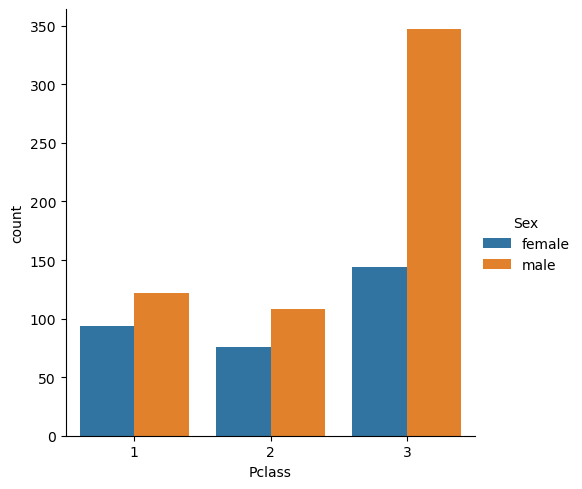

In [18]:
sns.catplot(data = titanic_df, x="Pclass", kind="count", hue="Sex")
plt.show()

In [20]:
def male_female_child(passenger):
    age, sex = passenger

    if age < 16:
        return "Child"
    else:
        return sex

In [21]:
# add person column to df, values gathered by function above
titanic_df["person"] = titanic_df[["Age", "Sex"]].apply(male_female_child, axis = 1)
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child


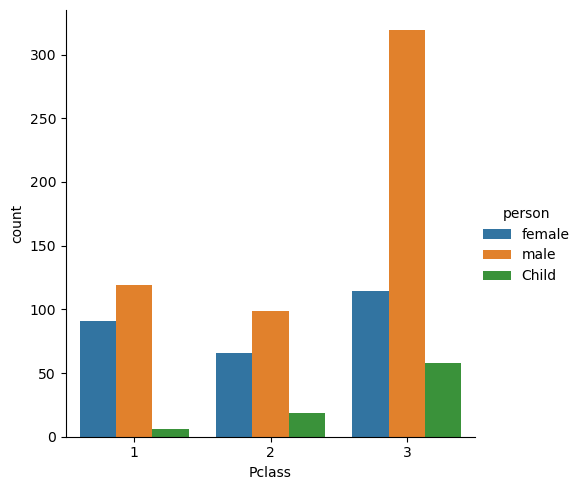

In [24]:
sns.catplot(data = titanic_df, x = "Pclass", hue="person", kind="count")
plt.show()

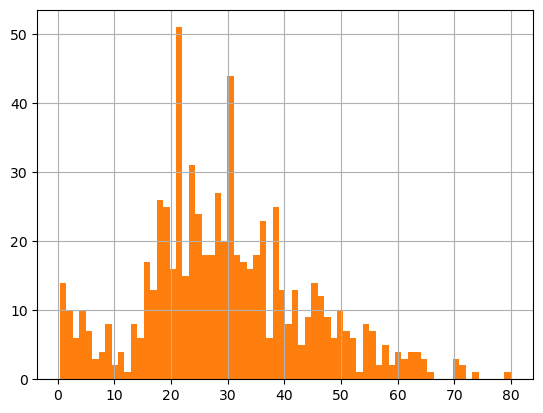

In [26]:
titanic_df["Age"].hist(bins = 70)
plt.show()

In [27]:
titanic_df["Age"].mean()

29.69911764705882

In [28]:
titanic_df["person"].value_counts()

person
male      537
female    271
Child      83
Name: count, dtype: int64

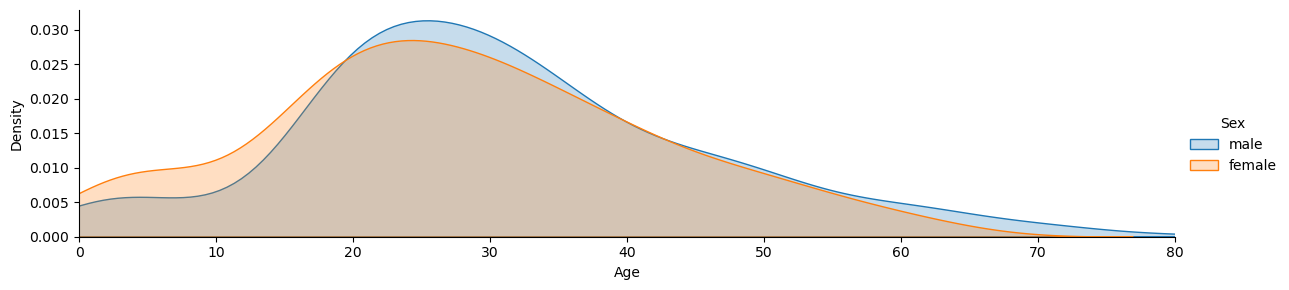

In [18]:
fig = sns.FacetGrid(titanic_df, hue = "Sex", aspect = 4)
fig.map(sns.kdeplot, "Age", fill = True)

oldest = titanic_df["Age"].max()
fig.set(xlim = (0, oldest))
fig.add_legend()

plt.show()

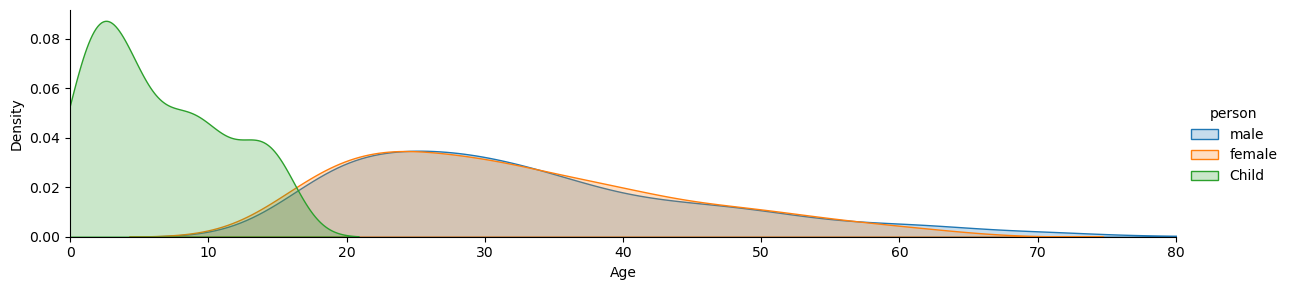

In [22]:
fig = sns.FacetGrid(titanic_df, hue = "person", aspect = 4)
fig.map(sns.kdeplot, "Age", fill = True)

oldest = titanic_df["Age"].max()
fig.set(xlim = (0, oldest))
fig.add_legend()

plt.show()

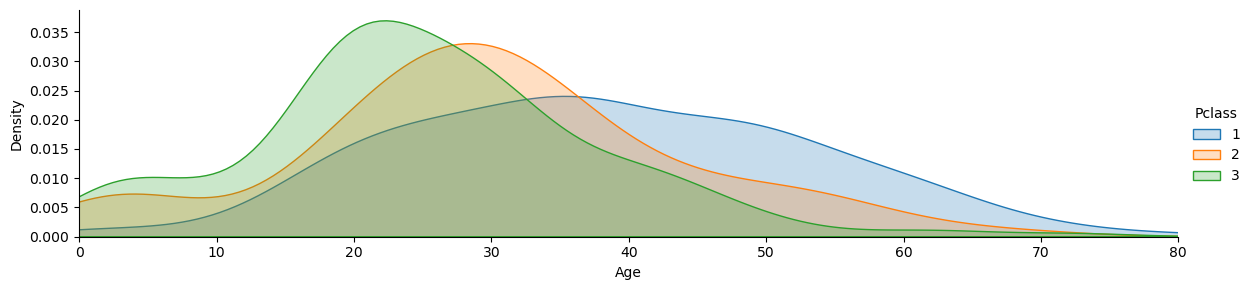

In [23]:
fig = sns.FacetGrid(titanic_df, hue = "Pclass", aspect = 4)
fig.map(sns.kdeplot, "Age", fill = True)

oldest = titanic_df["Age"].max()
fig.set(xlim = (0, oldest))
fig.add_legend()

plt.show()

In [24]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [ ]:
# 2.) What deck were the passengers on and how does that relate to their class?
deck = titanic_df["Cabin"].dropna()
# deck lists cabin level first, then number
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

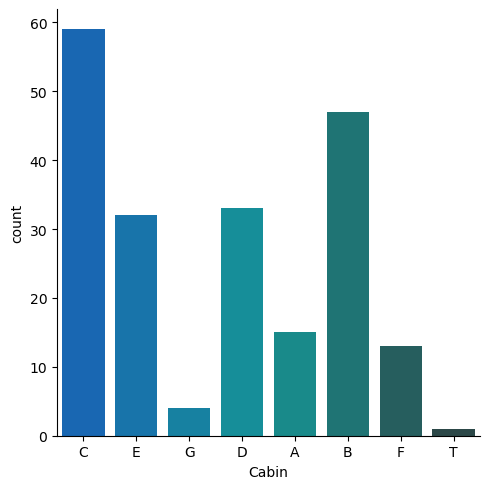

In [31]:
levels = []

for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ["Cabin"]

sns.catplot(x = "Cabin", data = cabin_df, hue = "Cabin", palette = "winter_d", kind = "count", legend = False) # _d darkens palettes
plt.show()

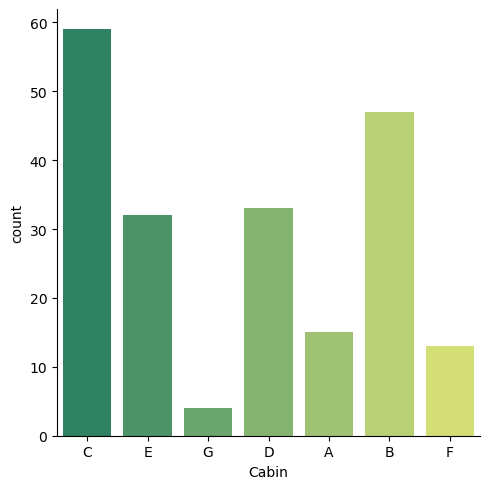

In [37]:
cabin_df = cabin_df[cabin_df.Cabin != "T"]
sns.catplot(x = "Cabin", data = cabin_df, hue = "Cabin",
            palette = "summer", kind = "count", legend = False)
plt.show()

In [38]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


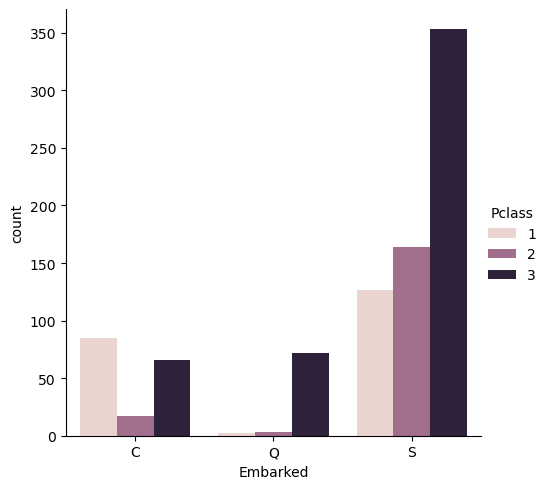

In [ ]:
# 3.) Where did the passengers come from?
# embarked values --- C = Cherbourg, S = Southampton, Q = Queenstown
sns.catplot(data = titanic_df, x = "Embarked", hue = "Pclass", order = ["C", "Q", "S"], kind = "count")
plt.show()

In [59]:
# 4.) Who was alone and who was with family?
titanic_df["Alone"] = titanic_df.SibSp + titanic_df.Parch
titanic_df.Alone.head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [60]:
titanic_df["Alone"].iloc[titanic_df["Alone"] > 0] = "With family"
titanic_df["Alone"].iloc[titanic_df["Alone"] == 0] = "Alone"
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
titanic_df.head()

C:\Users\jfhar\AppData\Local\Temp\ipykernel_16500\2994153498.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  titanic_df["Alone"].iloc[titanic_df["Alone"] > 0] = "With family"
C:\Users\jfhar\AppData\Local\Temp\ipykernel_16500\2994153498.p

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


In [61]:
# possible fix for "... not supported between instances of 'str' and 'int'"
# just tinkering

# 1 set condition list

# condlist = [
#     titanic_df["Alone"] > 0,
#     titanic_df["Alone"] == 0
# ]

# 2 set options

# choicelist = ["With family", "Alone"]

# titanic_df["Alone"] = np.select(
#     condlist, choicelist, default="NA")

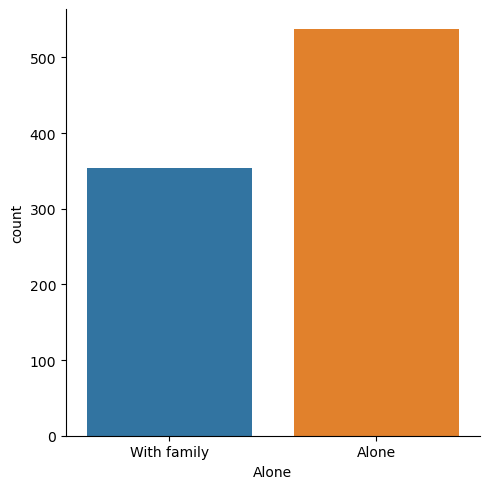

In [64]:
sns.catplot(data = titanic_df, x = "Alone", hue = "Alone", legend = False, kind = "count")
plt.show()

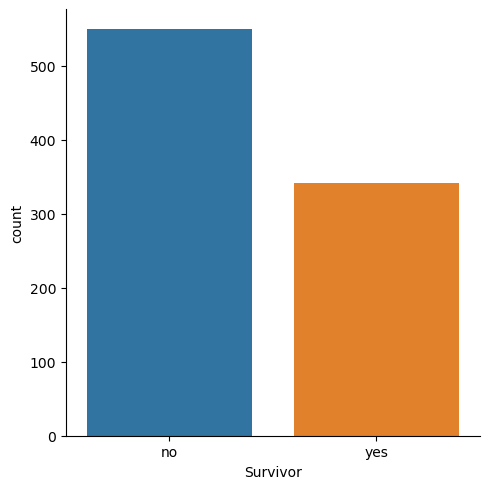

In [69]:
# More in-depth questions
# 5.) What factors helped someone survive the sinking?

titanic_df["Survivor"] = titanic_df.Survived.map({0 : "no", 1 : "yes"})
sns.catplot(x = "Survivor", data = titanic_df, hue = "Survivor", kind = "count")
plt.show()

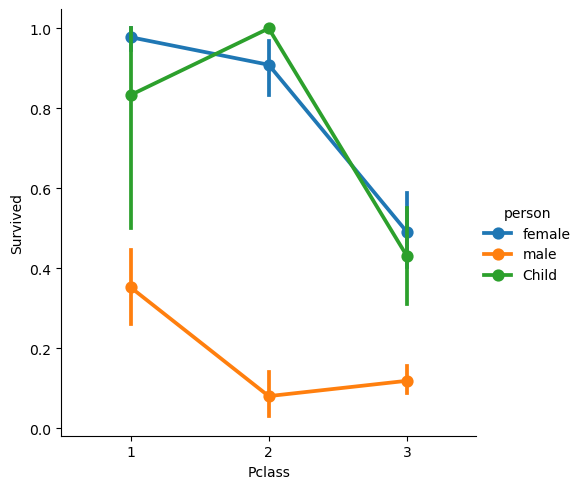

In [75]:
sns.catplot(data = titanic_df, x = "Pclass", y = "Survived", kind = "point", hue = "person")
plt.show()

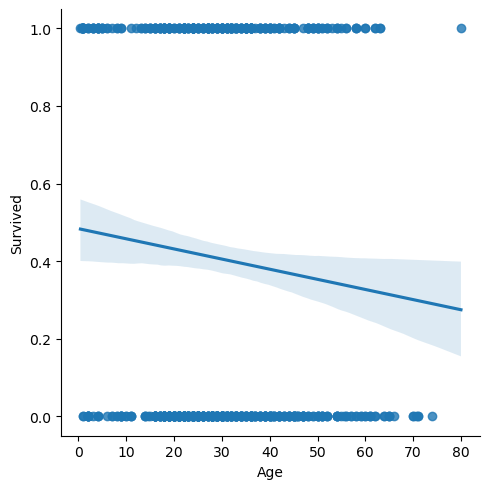

In [ ]:
# age v survived
sns.lmplot(x = "Age", y = "Survived", data = titanic_df)
plt.show()

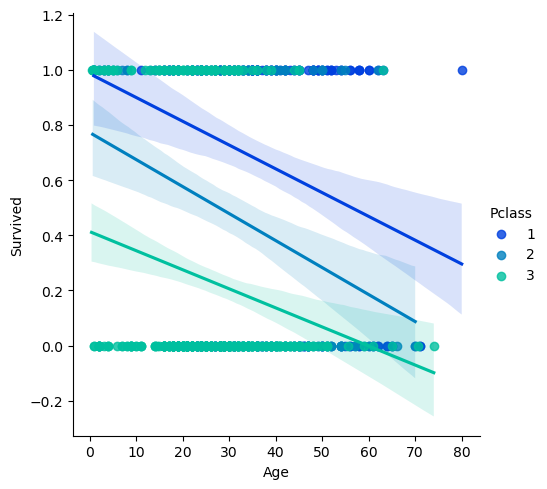

In [77]:
sns.lmplot(x = "Age", y = "Survived", data = titanic_df, hue = "Pclass", palette = "winter")
plt.show()

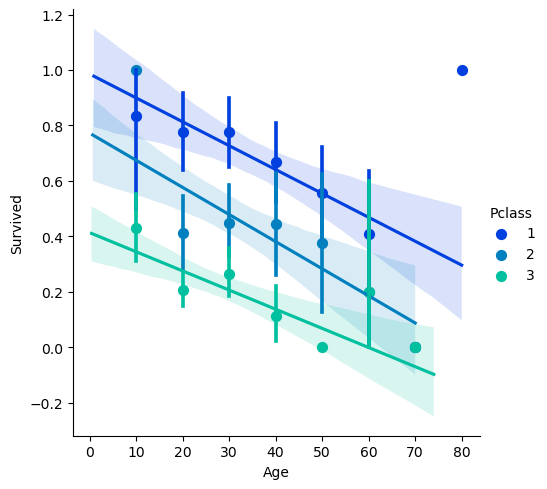

In [78]:
generations = [10, 20, 30, 40, 50, 60, 70, 80] # age bins
sns.lmplot(x = "Age", y = "Survived", data = titanic_df,
            hue = "Pclass", palette = "winter", x_bins = generations)
plt.show()

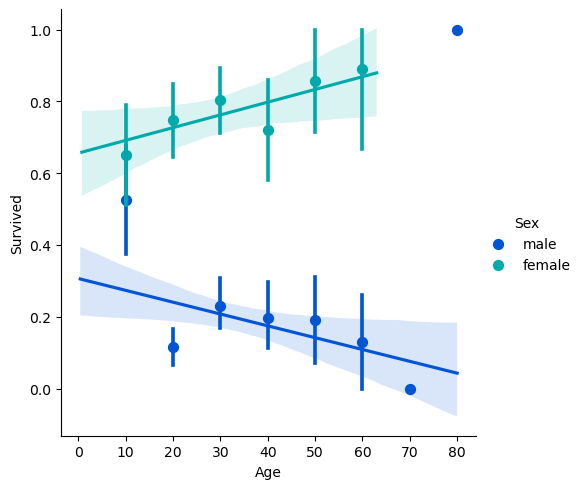

In [79]:
sns.lmplot(x = "Age", y = "Survived", data = titanic_df, hue = "Sex", palette = "winter", x_bins = generations)
plt.show()

In [82]:
# Additional questions

# 1.) Did the deck have an impact on survival? Does the data support your intutions?

# 2.) Did having a family member change your odds of surviving?
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


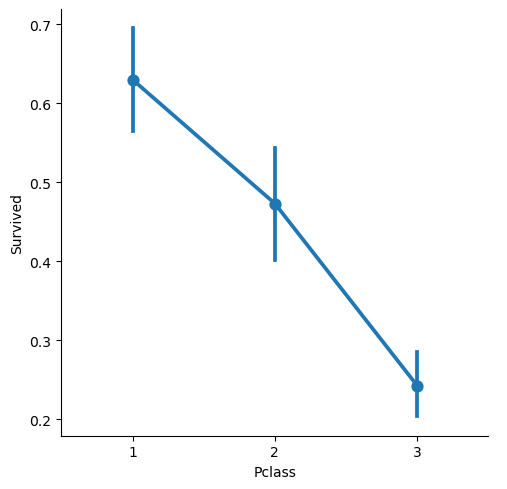

In [ ]:
# 1.) Did the deck have an impact on survival? Does the data support your intutions?
sns.catplot(x = "Pclass", y = "Survived", data = titanic_df, kind = "point")
plt.show()

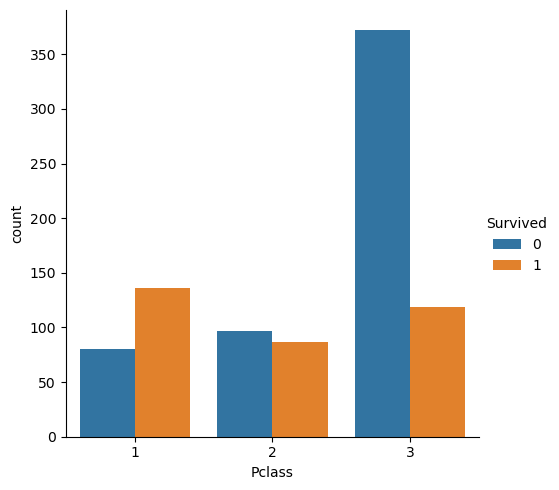

In [ ]:
# Survived values --- 0 = dead, 1 = alive
sns.catplot(x = "Pclass", data = titanic_df, hue = "Survived", kind = "count")
plt.show()

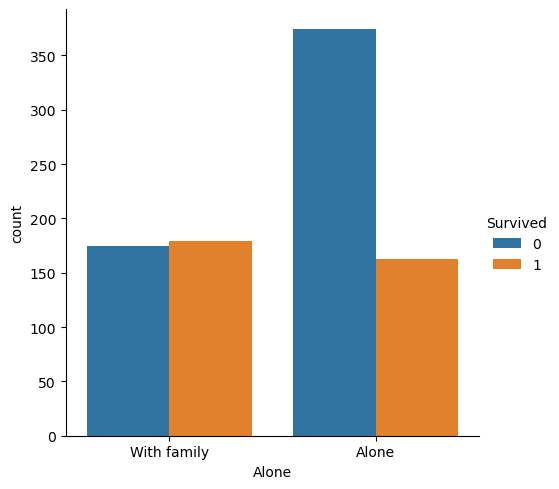

In [91]:
# 2.) Did having a family member change your odds of surviving?
sns.catplot(x = "Alone", data = titanic_df, hue = "Survived", kind = "count")
plt.show()

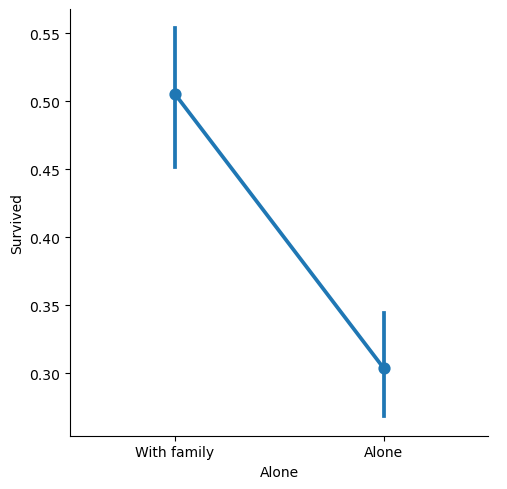

In [92]:
sns.catplot(x = "Alone", y = "Survived", data = titanic_df, kind = "point")
plt.show()